# Update of fragmentation scalar to use HLM temperature and moisture scalars

- Issue: https://github.com/NGEET/fates/issues/699
- Pull request: https://github.com/NGEET/fates/pull/705

## Import libraries

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

## Load history output data

In [2]:
filename_history_frag = 'data/5yearcat.nc'      # Test data
filename_history_base = 'data/5yearcat-base.nc' # Baseline data
data_frag = xr.open_dataset(filename_history_frag)
data_base = xr.open_dataset(filename_history_base)

## Select a subset of data

Below ground course woody debris

In [30]:
litter_bg_frag = data_frag.LITTER_CWD_BG_ELEM.sel(fates_levelem=0)
litter_bg_base = data_base.LITTER_CWD_BG_ELEM.sel(fates_levelem=0)
litter_bg_diff = litter_bg_frag - litter_bg_frag

## Plot the data

### Global plots

In [39]:
litter_bg_frag.dims

('time', 'lat', 'lon')

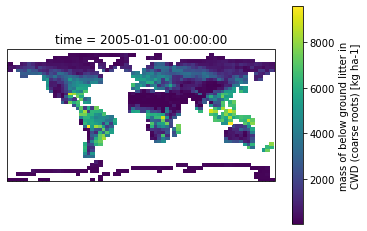

In [89]:
# ax = plt.subplot(projection=ccrs.PlateCarree())
litt_bg_plot = litter_bg_frag.isel(time=59).plot(x='lon',y='lat',transform=ccrs.PlateCarree(),
                                                 subplot_kws={'projection':ccrs.PlateCarree()})
# litt_bg_plot = litter_bg_frag.isel(time=59).plot(x='lon',y='lat',col='time',col_wrap=4,
#                                                  transform=ccrs.PlateCarree(),
#                                                  subplot_kws={'projection':ccrs.PlateCarree()})
# litt_bg_plot = litter_bg_frag.plot.pcolormesh(x='lon',y='lat',col='time',col_wrap=4,
#                                                  transform=ccrs.PlateCarree(),
#                                                  subplot_kws={'projection':ccrs.PlateCarree()})

# for ax in litt_bg_plot.axes.flat:
#     ax.coastlines()
# ax.set_global()
# ax.coastlines()

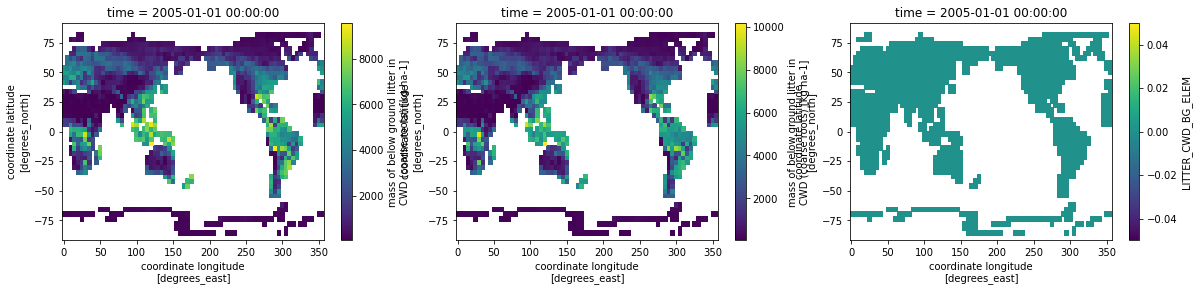

In [102]:
tstop_idx = 59
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
litter_bg_frag.isel(time=tstop_idx).plot(ax=ax1)
litter_bg_base.isel(time=tstop_idx).plot(ax=ax2)
litter_bg_diff.isel(time=tstop_idx).plot(ax=ax3)

### Regional plot